In [3]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
import math

# LIF

In [4]:
class LIF():
    
    def __init__(self, I, t_total_ms = 100, dt_ms = 0.1, R = 10, tau = 8, threshold = -45,
                 u_start = -80, u_rest = -79, u_reset = -65, u_spike = 5):
        self.I = I
        self.t_total_ms = t_total_ms
        self.dt_ms = dt_ms
        self.R = R
        self.tau = tau
        self.threshold = threshold
        self.u_start = u_start
        self.u_current = u_start
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.u_spike = u_spike
        self.u_arr = []
        self.fire_count = 0


    def run(self):
        t_current_ms = 0
        while t_current_ms <= self.t_total_ms:
            dudt = (-1 * (self.u_current - self.u_rest) + self.R * self.I(t_current_ms))/ self.tau
            self.u_current += dudt * self.dt_ms
            if self.u_current >= self.threshold:
                self.T = t_current_ms
                self.fire_count += 1
                self.u_arr.append(self.u_current + self.u_spike)
                self.u_current = self.u_reset
                
            self.u_arr.append(self.u_current)
            t_current_ms += self.dt_ms
            
    def u_plot(self):
        t_arr =  range(len(self.u_arr))
        plt.plot(list(map(lambda i: i * self.dt_ms, t_arr)), self.u_arr, c='g')
        plt.suptitle("LIF", c= 'g', fontsize= 20)
        plt.xlabel("Time (ms)")
        plt.ylabel("Membrane Potential (mv)")
        plt.show()
        print("R: " + str(self.R) +
        "    threshold: " + str(self.threshold) + 
        "    u_rest: " + str(self.u_rest) + 
        "    u_reset: " + str(self.u_reset) + 
        "    u_spike: " + str(self.u_spike) + "\n"+
        "u_start: " + str(self.u_start) +
        "    tau: " + str(self.tau) + 
        "    total time: " + str(self.t_total_ms) + 
        "    dt: " + str(self.dt_ms))

    def i_plot(self):
        plt.plot(np.arange(0,100,0.1),list(map(I,np.arange(0,100,0.1))), c='r')
        plt.suptitle("LIF", c= 'r', fontsize= 20)
        plt.xlabel("Time (ms)")
        plt.ylabel("Input Current (pA)")
        plt.show()
        print("R: " + str(self.R) +
        "    threshold: " + str(self.threshold) + 
        "    u_rest: " + str(self.u_rest) + 
        "    u_reset: " + str(self.u_reset) + 
        "    u_spike: " + str(self.u_spike) + "\n"+
        "u_start: " + str(self.u_start) +
        "    tau: " + str(self.tau) + 
        "    total time: " + str(self.t_total_ms) + 
        "    dt: " + str(self.dt_ms))
        
    def f_plot(self):
        freq_arr = []
        for i in list(np.arange(1,8,0.5)):
            I = lambda x: i
            lif = LIF(I=I)
            lif.run()
            freq_arr.append(lif.fire_count/lif.t_total_ms)
        plt.plot(range(len(freq_arr)), freq_arr, 'y')
        plt.show()

### LIF Frequency 

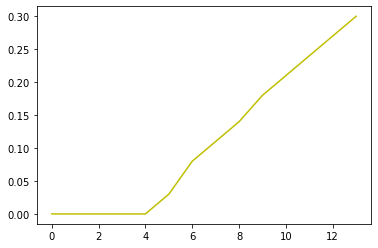

In [5]:
neuron = LIF(I= lambda x: 0)
neuron.run()
neuron.f_plot()

### LIF 1

#### Constant Current

In [6]:
I = lambda x: 5
neuron = LIF(I=I)
neuron.run()

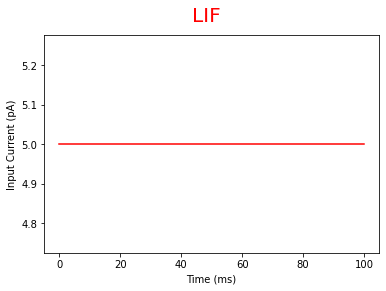

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -80    tau: 8    total time: 100    dt: 0.1


In [7]:
neuron.i_plot()

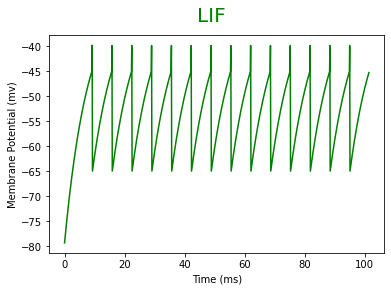

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -80    tau: 8    total time: 100    dt: 0.1


In [8]:
neuron.u_plot()

### LIF 2

#### Step-function Current

In [9]:
I = lambda x: math.floor(x/10)
neuron = LIF(I=I)
neuron.run()

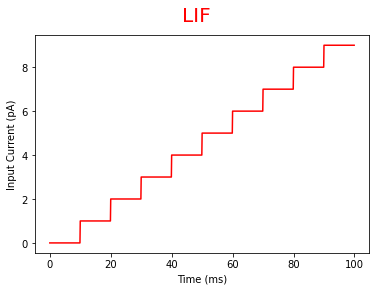

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -80    tau: 8    total time: 100    dt: 0.1


In [10]:
neuron.i_plot()

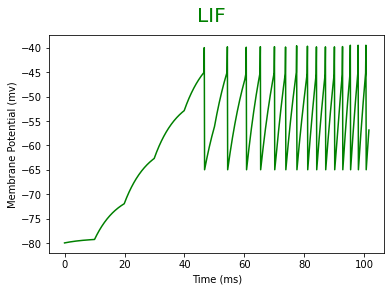

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -80    tau: 8    total time: 100    dt: 0.1


In [11]:
neuron.u_plot()

### LIF 3

#### Sine Wave Current

In [12]:
I = lambda x: 4 * (math.sin(x) + 0.9)
neuron = LIF(I=I)
neuron.run()

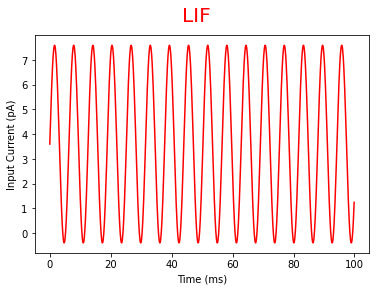

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -80    tau: 8    total time: 100    dt: 0.1


In [13]:
neuron.i_plot()

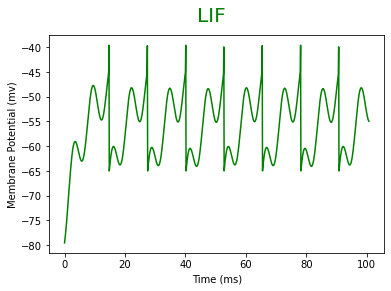

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -80    tau: 8    total time: 100    dt: 0.1


In [14]:
neuron.u_plot()

### LIF 4

#### Second Degree Equation Input

In [15]:
I = lambda x: (pow(x - 20,2) + 3*x + 5)/1000
neuron = LIF(I=I, u_start= - 90)
neuron.run()

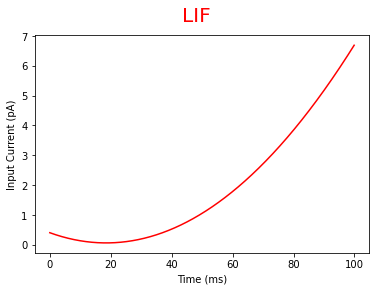

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -90    tau: 8    total time: 100    dt: 0.1


In [16]:
neuron.i_plot()

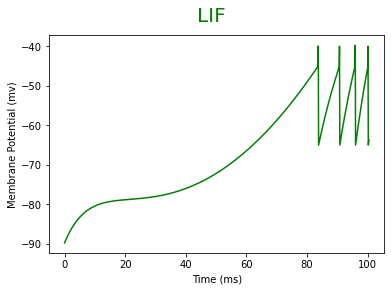

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -90    tau: 8    total time: 100    dt: 0.1


In [17]:
neuron.u_plot()

### LIF 5

#### Radical

In [18]:
I = lambda x: pow(x,1/2)
neuron = LIF(I=I, u_start= - 50)
neuron.run()

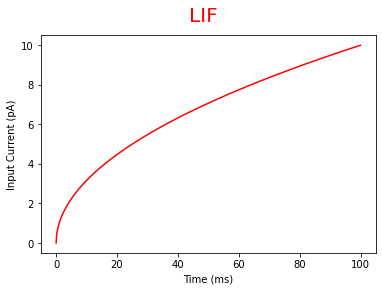

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -50    tau: 8    total time: 100    dt: 0.1


In [19]:
neuron.i_plot()

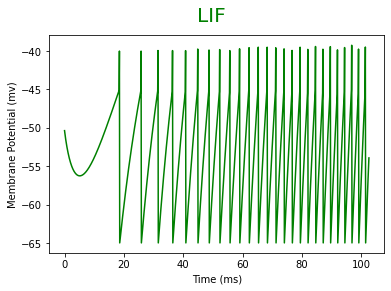

R: 10    threshold: -45    u_rest: -79    u_reset: -65    u_spike: 5
u_start: -50    tau: 8    total time: 100    dt: 0.1


In [20]:
neuron.u_plot()

# ALIF

In [21]:
class ALIF():
    
    def __init__(self, I, t_total_ms = 100, dt_ms = 0.1, R = 10, tau = 8, threshold = -50,
                 u_start = -80, u_rest = -70, u_reset = -65, u_spike = 10, tau_k = 1, a = 0.01, b = 0.5):
        self.I = I
        self.t_total_ms = t_total_ms
        self.dt_ms = dt_ms
        self.R = R
        self.tau = tau
        self.threshold = threshold
        self.u_start = u_start
        self.u_current = u_start
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.u_spike = u_spike
        self.u_arr = []
        self.fire_count = 0
        self.T = 0
        self.tau_k = tau_k
        self.a = a
        self.b = b
        self.w = 0
        self.w_arr = []
        
    def run(self):
        t_current_ms = 0
        while t_current_ms <= self.t_total_ms:
            delta_u = self.u_current - self.u_rest
            dwdt = (self.a * delta_u - self.w) / self.tau_k + self.b * self.fire_count
            self.w += dwdt * self.dt_ms
            adaptation = self.R * self.w 
            dudt = (-1 * delta_u - adaptation + self.R * self.I(t_current_ms))/ self.tau
            self.u_current += dudt * self.dt_ms
            if self.u_current >= self.threshold:
                self.T = t_current_ms
                self.fire_count += 1
                self.u_arr.append(self.u_current + self.u_spike)
                self.u_current = self.u_reset
            self.w_arr.append(self.w)    
            self.u_arr.append(self.u_current)
            t_current_ms += self.dt_ms

    def u_plot(self):
        t_arr =  range(len(self.u_arr))
        plt.plot(list(map(lambda i: i * self.dt_ms, t_arr)), self.u_arr, c='g')
        plt.suptitle("ALIF", c= 'g', fontsize= 15)
        plt.xlabel("Time (ms)")
        plt.ylabel("Membrane Potential (mv)")
        plt.show()
        print("R: " + str(self.R) +
        "    threshold: " + str(self.threshold) + 
        "    u_rest: " + str(self.u_rest) + 
        "    u_reset: " + str(self.u_reset) + 
        "    u_spike: " + str(self.u_spike) + "\n"+
        "u_start: " + str(self.u_start) +
        "    tau: " + str(self.tau) + 
        "    total time: " + str(self.t_total_ms) + 
        "    dt: " + str(self.dt_ms) + "\n" + 
        "a: " + str(self.a) + 
        "    b: " + str(self.b) + 
        "    tau_k: " + str(self.tau_k))
    
    def i_plot(self):
        plt.plot(np.arange(0,100,0.1),list(map(I,np.arange(0,100,0.1))), c='r')
        plt.suptitle("Input Current", c= 'r', fontsize= 15)
        plt.xlabel("Time (ms)")
        plt.ylabel("Input Current (pA)")
        plt.show()
        print("R: " + str(self.R) +
        "    threshold: " + str(self.threshold) + 
        "    u_rest: " + str(self.u_rest) + 
        "    u_reset: " + str(self.u_reset) + 
        "    u_spike: " + str(self.u_spike) + "\n"+
        "u_start: " + str(self.u_start) +
        "    tau: " + str(self.tau) + 
        "    total time: " + str(self.t_total_ms) + 
        "    dt: " + str(self.dt_ms) + "\n" + 
        "a: " + str(self.a) + 
        "    b: " + str(self.b) + 
        "    tau_k: " + str(self.tau_k))
            
    def w_plot(self):
        t_arr =  range(len(self.w_arr))
        plt.plot(list(map(lambda i: i * self.dt_ms, t_arr)), self.w_arr, c='b')
        plt.suptitle("W", c= 'b', fontsize= 15)
        plt.xlabel("Time (ms)")
        plt.ylabel("Adaptation Current (pA)")
        plt.show()
        print("R: " + str(self.R) +
        "    threshold: " + str(self.threshold) + 
        "    u_rest: " + str(self.u_rest) + 
        "    u_reset: " + str(self.u_reset) + 
        "    u_spike: " + str(self.u_spike) + "\n"+
        "u_start: " + str(self.u_start) +
        "    tau: " + str(self.tau) + 
        "    total time: " + str(self.t_total_ms) + 
        "    dt: " + str(self.dt_ms) + "\n" + 
        "a: " + str(self.a) + 
        "    b: " + str(self.b) + 
        "    tau_k: " + str(self.tau_k))
            
    def f_plot(self):
        freq_arr = []
        for i in list(np.arange(1,8,0.5)):
            I = lambda x: i
            lif = ALIF(I=I)
            lif.run()
            freq_arr.append(lif.fire_count/lif.t_total_ms)
        plt.plot(range(len(freq_arr)), freq_arr, 'y')
        plt.show()

### ALIF Frequency

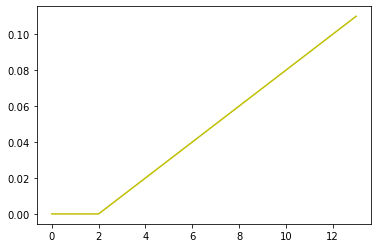

In [22]:
neuron = ALIF(I= lambda x: 0)
neuron.run()
neuron.f_plot()

### ALIF 1

In [23]:
def I(x):
    if x > 10:
        return 4
    return 0

neuron = ALIF(I=I)
neuron.run()

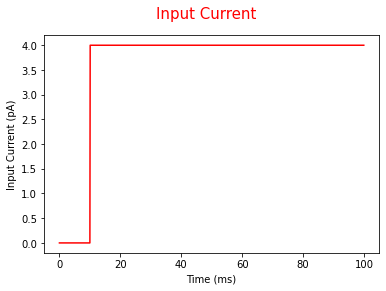

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [24]:
neuron.i_plot()

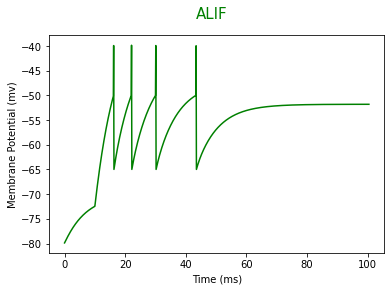

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [25]:
neuron.u_plot()

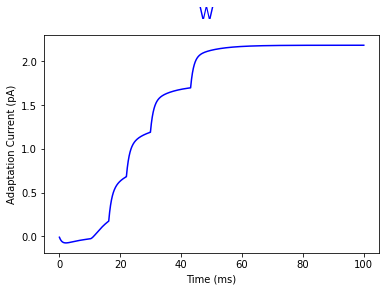

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [26]:
neuron.w_plot()

### ALIF 2

In [27]:
I = lambda x: 10
neuron = ALIF(I=I)
neuron.run()

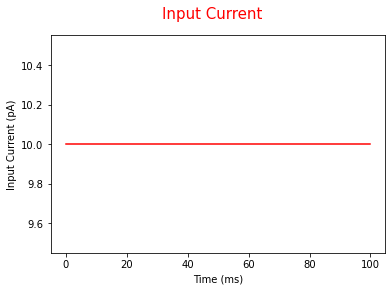

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [28]:
neuron.i_plot()

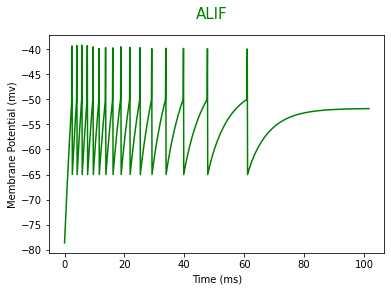

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [29]:
neuron.u_plot()

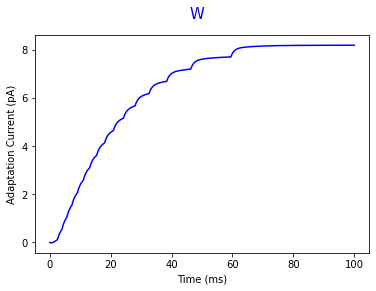

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [30]:
neuron.w_plot()

### ALIF 3

In [31]:
I = lambda x: math.floor(x/10)
neuron = ALIF(I=I)
neuron.run()

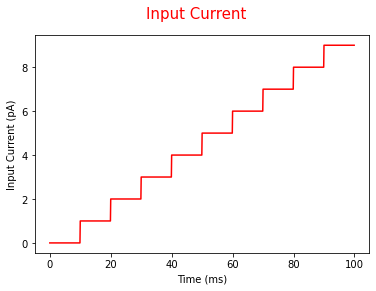

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [32]:
neuron.i_plot()

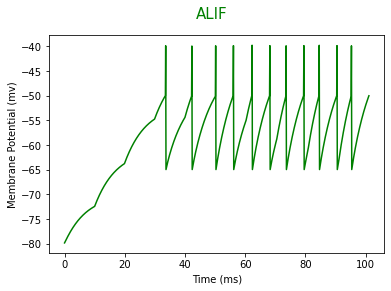

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [33]:
neuron.u_plot()

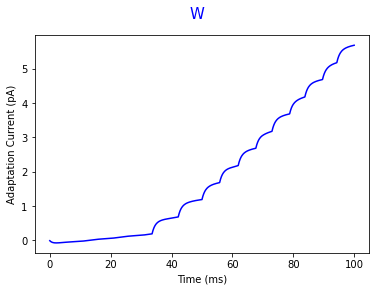

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [34]:
neuron.w_plot()

### ALIF 4

In [35]:
I = lambda x: 4 * (math.sin(x) + 0.9)
neuron = ALIF(I=I)
neuron.run()

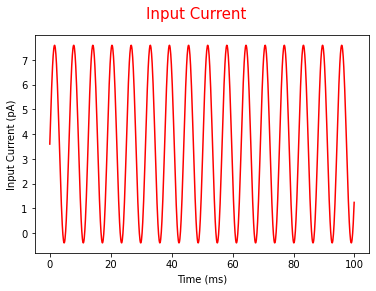

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [36]:
neuron.i_plot()

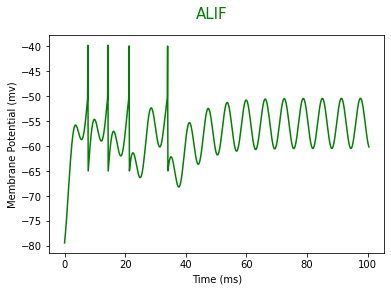

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [37]:
neuron.u_plot()

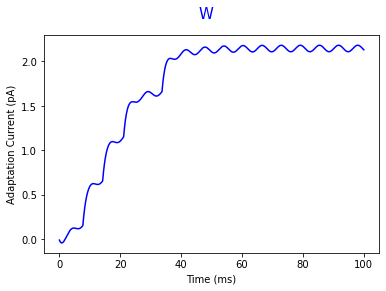

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [38]:
neuron.w_plot()

### ALIF 5

In [39]:
I = lambda x: pow(4*x + 5, 1/2) + 7
neuron = ALIF(I=I)
neuron.run()

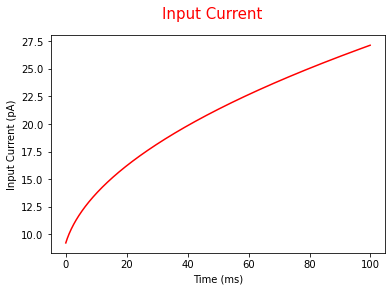

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [40]:
neuron.i_plot()

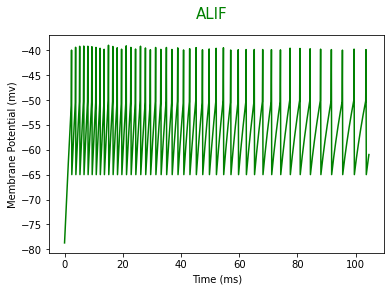

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [41]:
neuron.u_plot()

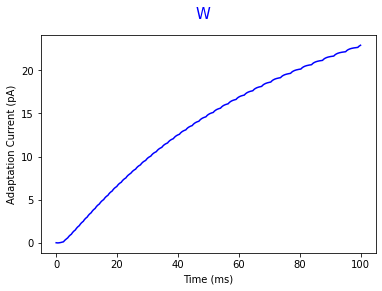

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1


In [42]:
neuron.w_plot()

# AٍELIF

In [43]:
class AELIF():
    
    def __init__(self, I, t_total_ms = 100, dt_ms = 0.1, R = 10, tau = 8, threshold = -50,
                 u_start = -80, u_rest = -70, u_reset = -65, u_spike = 10,theta_rh = -58, tau_k = 1, a = 0.01, b = 0.5):
        self.I = I
        self.t_total_ms = t_total_ms
        self.dt_ms = dt_ms
        self.R = R
        self.tau = tau
        self.threshold = threshold
        self.u_start = u_start
        self.u_current = u_start
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.u_spike = u_spike
        self.u_arr = []
        self.fire_count = 0
        self.T = 0
        self.theta_rh = theta_rh
        self.tau_k = tau_k
        self.a = a
        self.b = b
        self.w = 0
        self.w_arr = []
        
    def run(self):
        t_current_ms = 0
        while t_current_ms <= self.t_total_ms:
            delta_u = self.u_current - self.u_rest
            dwdt = (self.a * delta_u - self.w) / self.tau_k + self.b * self.fire_count
            self.w += dwdt * self.dt_ms
            exponential = self.t_total_ms * math.exp((self.u_current - self.theta_rh)/self.t_total_ms)
            adaptation = self.R * self.w 
            dudt = (-1 * delta_u - adaptation + exponential + self.R * self.I(t_current_ms))/ self.tau
            self.u_current += dudt * self.dt_ms
            if self.u_current >= self.threshold:
                self.T = t_current_ms
                self.fire_count += 1
                self.u_arr.append(self.u_current + self.u_spike)
                self.u_current = self.u_reset
            self.w_arr.append(self.w)    
            self.u_arr.append(self.u_current)
            t_current_ms += self.dt_ms

    def u_plot(self):
        t_arr =  range(len(self.u_arr))
        plt.plot(list(map(lambda i: i * self.dt_ms, t_arr)), self.u_arr, c='g')
        plt.suptitle("AELIF", c= 'g', fontsize= 15)
        plt.xlabel("Time (ms)")
        plt.ylabel("Membrane Potential (mv)")
        plt.show()
        print("R: " + str(self.R) +
        "    threshold: " + str(self.threshold) + 
        "    u_rest: " + str(self.u_rest) + 
        "    u_reset: " + str(self.u_reset) + 
        "    u_spike: " + str(self.u_spike) + "\n"+
        "u_start: " + str(self.u_start) +
        "    tau: " + str(self.tau) + 
        "    total time: " + str(self.t_total_ms) + 
        "    dt: " + str(self.dt_ms) + "\n" + 
        "a: " + str(self.a) + 
        "    b: " + str(self.b) + 
        "    tau_k: " + str(self.tau_k) +
        "    theta_rh: " + str(self.theta_rh))

    def i_plot(self):
        plt.plot(np.arange(0,100,0.1),list(map(I,np.arange(0,100,0.1))), c='r')
        plt.suptitle("Input Current", c= 'r', fontsize= 15)
        plt.xlabel("Time (ms)")
        plt.ylabel("Input Current (pA)")
        plt.show()
        print("R: " + str(self.R) +
        "    threshold: " + str(self.threshold) + 
        "    u_rest: " + str(self.u_rest) + 
        "    u_reset: " + str(self.u_reset) + 
        "    u_spike: " + str(self.u_spike) + "\n"+
        "u_start: " + str(self.u_start) +
        "    tau: " + str(self.tau) + 
        "    total time: " + str(self.t_total_ms) + 
        "    dt: " + str(self.dt_ms) + "\n" + 
        "a: " + str(self.a) + 
        "    b: " + str(self.b) + 
        "    tau_k: " + str(self.tau_k))
            
    def w_plot(self):
        t_arr =  range(len(self.w_arr))
        plt.plot(list(map(lambda i: i * self.dt_ms, t_arr)), self.w_arr, c='b')
        plt.suptitle("W", c= 'b', fontsize= 15)
        plt.xlabel("Time (ms)")
        plt.ylabel("Adaptation Current (pA)")
        plt.show()
        print("R: " + str(self.R) +
        "    threshold: " + str(self.threshold) + 
        "    u_rest: " + str(self.u_rest) + 
        "    u_reset: " + str(self.u_reset) + 
        "    u_spike: " + str(self.u_spike) + "\n"+
        "    u_start: " + str(self.u_start) +
        "    tau: " + str(self.tau) + 
        "    total time: " + str(self.t_total_ms) + 
        "    dt: " + str(self.dt_ms) + "\n" + 
        "    a: " + str(self.a) + 
        "    b: " + str(self.b) + 
        "    tau_k: " + str(self.tau_k))
            
    def f_plot(self):
        freq_arr = []
        for i in list(np.arange(1,8,0.5)):
            I = lambda x: i
            lif = AELIF(I=I)
            lif.run()
            freq_arr.append(lif.fire_count/lif.t_total_ms)
        plt.plot(range(len(freq_arr)), freq_arr, 'y')
        plt.show()

### AELIF Frequency

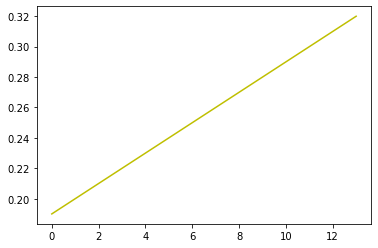

In [44]:
neuron = AELIF(I= lambda x: 1)
neuron.run()
neuron.f_plot()

### AELIF 1

In [45]:
def I(x):
    if x <= 10:
        return 0
    return 4

neuron = AELIF(I=I)
neuron.run()

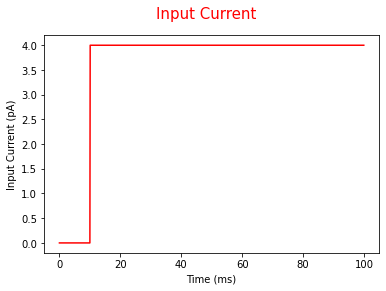

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [46]:
neuron.i_plot()

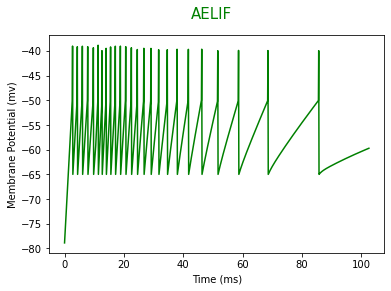

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1    theta_rh: -58


In [47]:
neuron.u_plot()

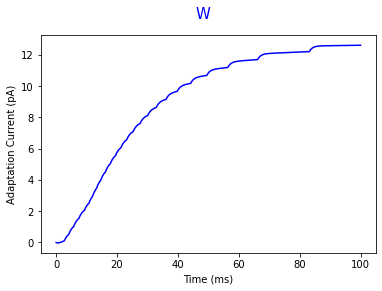

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [48]:
neuron.w_plot()

### AELIF 2 

In [49]:
I = lambda x: 10
neuron = AELIF(I=I)
neuron.run()

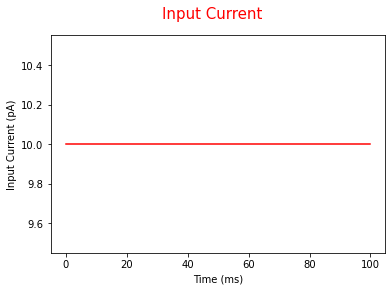

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [50]:
neuron.i_plot()

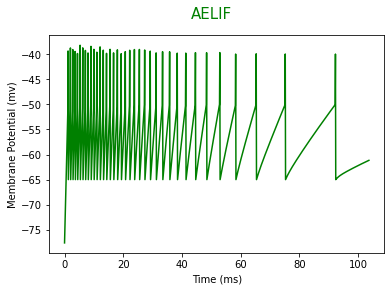

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1    theta_rh: -58


In [51]:
neuron.u_plot()

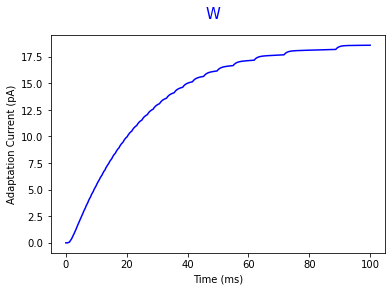

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [52]:
neuron.w_plot()

### AELIF 3

In [53]:
I = lambda x: math.floor(x/10)
neuron = AELIF(I=I)
neuron.run()

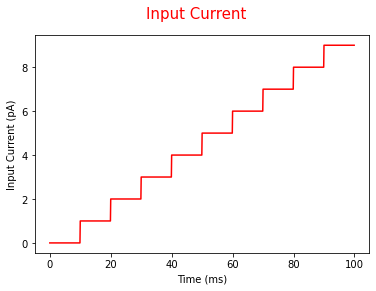

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [54]:
neuron.i_plot()

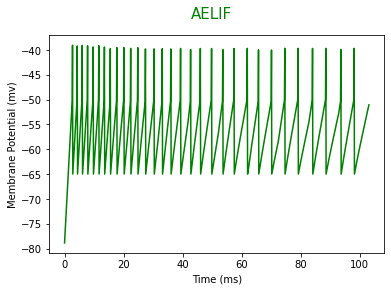

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1    theta_rh: -58


In [55]:
neuron.u_plot()

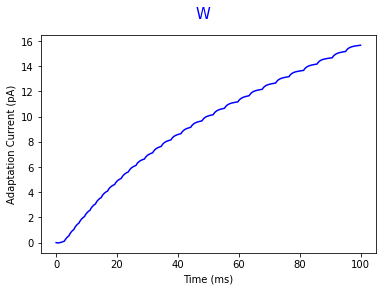

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [56]:
neuron.w_plot()

### AELIF 4

In [57]:
I = lambda x: 1/2 * (math.sin(x) + 5)
neuron = AELIF(I=I)
neuron.run()

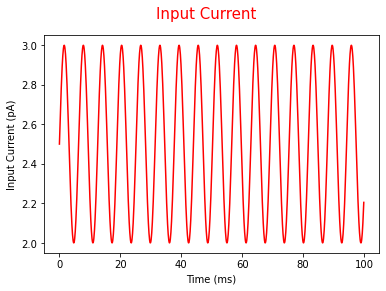

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [58]:
neuron.i_plot()

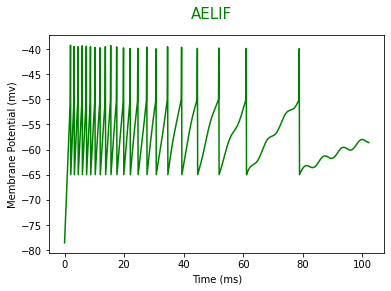

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1    theta_rh: -58


In [59]:
neuron.u_plot()

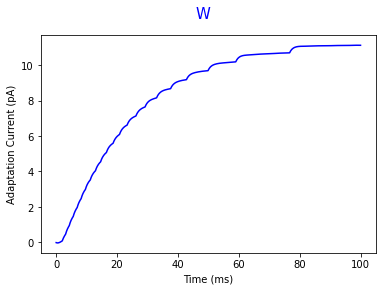

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [60]:
neuron.w_plot()

### AELIF 5

In [61]:
I = lambda x: (pow(x - 50,2) + 3*x + 5)/1000
neuron = AELIF(I=I)
neuron.run()

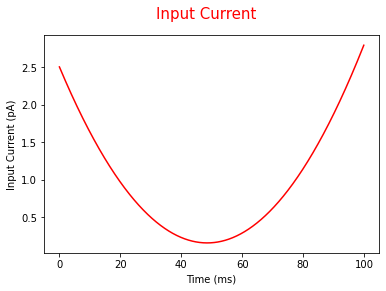

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [62]:
neuron.i_plot()

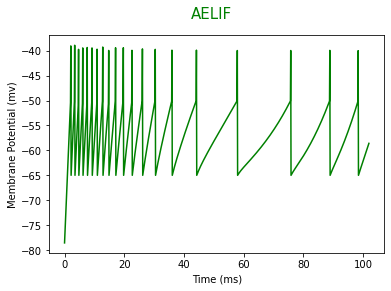

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
u_start: -80    tau: 8    total time: 100    dt: 0.1
a: 0.01    b: 0.5    tau_k: 1    theta_rh: -58


In [63]:
neuron.u_plot()

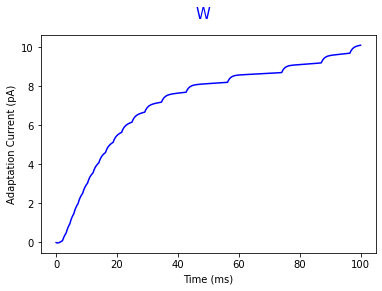

R: 10    threshold: -50    u_rest: -70    u_reset: -65    u_spike: 10
    u_start: -80    tau: 8    total time: 100    dt: 0.1
    a: 0.01    b: 0.5    tau_k: 1


In [64]:
neuron.w_plot()